-----------ORIGINAL IMAGE-----------


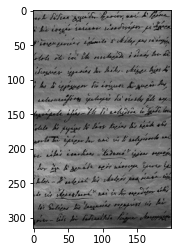

-----------THRESHOLDED IMAGE FOR NEIGHBORHOOD SIZE 3 -----------


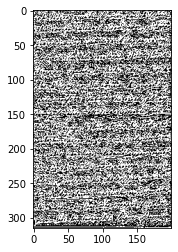

-----------THRESHOLDED IMAGE FOR NEIGHBORHOOD SIZE 11 -----------


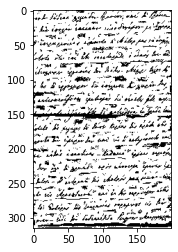

-----------THRESHOLDED IMAGE FOR NEIGHBORHOOD SIZE 25 -----------


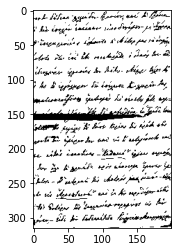

In [13]:
import sys 
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def calculate_intra_class_variance(A, k):
    #separate image into 2 classes
    class1_pixels = A[A < k]
    class2_pixels = A[A >=k]
    #calculate mean value of pixels for each class
    class1_mean = np.mean(class1_pixels)
    class2_mean = np.mean(class2_pixels)
    #calculate total image mean
    image_mean = np.mean(A.flatten())
    #calculate the propabilities of the 2 classes
    class1_propability = len(class1_pixels) / (len(class1_pixels) + len(class2_pixels))
    class2_propability = len(class2_pixels) / (len(class1_pixels) + len(class2_pixels))
    #calculate intra class variance
    intra_class_variance = class1_propability * (class1_mean - image_mean)**2 + class2_propability * (class2_mean - image_mean)**2
    return(intra_class_variance)

#Otsu thresholding
def otsu_thresholder(image):
    best_threshold = 0
    best_value = 0
    for i in range(0, 256, 4):
        intra_class_variance = calculate_intra_class_variance(image, i)
        if(intra_class_variance > best_value):
            best_threshold = i 
            best_value = intra_class_variance
    return(best_threshold)

def adaptive_thresholding(neighborhood_size):
    #calculation of the half neighborhood_size so it can be used later in picking the
    #neighbooring pixels
    neighborhood_half_size = int(neighborhood_size/2)
    #find image dimensions
    height = image.shape[0]
    width = image.shape[1]
    #create new image array
    thresholded_image = np.zeros_like(image)
    #for each pixel in image calculate a neighborhood
    for x in range(height):
        for y in range(width):
            #find top-left pixel coordinates of the neighborhood
            neighborhood_x = x-neighborhood_half_size;
            neighborhood_y = y-neighborhood_half_size;
            #initalize neighborhood information
            neighborhood_array = []
            pointer = -1
            #adding valid pixels to the neighborhood
            for i in range(neighborhood_x, neighborhood_x + neighborhood_size):
                #check if i is in valid range
                if(i >= 0 and i<= height-1):
                    neighborhood_array.append([])
                    pointer += 1
                    for j in range(neighborhood_y, neighborhood_y + neighborhood_size):
                        #check if j is in valid range
                        if(j >= 0 and j <= width-1):
                            neighborhood_array[pointer].append(image[i][j])
            #pass the calculated neighborhood as an image to otsu otsu_thresholder
            threshold = otsu_thresholder(np.array(neighborhood_array))
            #threshold the current pixel according to best threshold from otsu
            if(image[x][y] <= threshold):
                thresholded_image[x][y] = 0
            else:
                thresholded_image[x][y] = 255        
    #show the resulted image
    print("-----------THRESHOLDED IMAGE FOR NEIGHBORHOOD SIZE",neighborhood_size, "-----------")
    plt.imshow(thresholded_image, cmap='gray')
    plt.show()

#Import image from disk  
image = np.array(Image.open("trikoupi6_low.png"))
print("-----------ORIGINAL IMAGE-----------")
#Show image in grayscale with min value(black) = 0 and max value(white) = 255
plt.imshow(image, cmap="gray", vmin=0, vmax=255)
plt.show()

#Chhecking if image is RGB and converted to gray
if(len(image.shape) == 3):
        for i in range(len(image)):
            row = []
            new_image.append(row)
            for j in range(len(image[i])):
                #if image is RGB calculate the average of Red Green Blue values as
                #the new value for every pixel
                new_image[i].append(np.average(image[i][j]))
else:
    #if its not RGB just copy the image as it is
    new_image = np.copy(image)

adaptive_thresholding(3)
adaptive_thresholding(11)
adaptive_thresholding(25)
